In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

import os
import sys
sys.path.append('../')

import argparse
import cv2
import torch
from glob import glob

from pysot.core.config import cfg
from pysot.models.model_builder import ModelBuilder
from pysot.tracker.hift_tracker import HiFTTracker
from pysot.utils.model_load import load_pretrain

In [3]:
import matplotlib.pyplot as plt

In [2]:
config_path = "./experiments/config.yaml"
snapshot = "./pretrained_models/general_model.pth"
test_path = "sample_pose.jpg"

In [5]:
# config
cfg.merge_from_file(config_path)
cfg.CUDA = torch.cuda.is_available()
device = torch.device('cuda' if cfg.CUDA else 'cpu')

In [6]:
# load model
model = ModelBuilder()
model = load_pretrain(model, snapshot).eval().to(device)

In [7]:
# build tracker
tracker = HiFTTracker(model)

In [8]:
img = cv2.imread(test_path)
ims = [img,img,img]

In [9]:
start=True
for im in ims:
    if start:
        x,y,w,h = 20,210,120,320 # example init rect
        init_rect=[x,y,w,h]
        
        tracker.init(im,init_rect)
        start=False
    else:
        outputs = tracker.track(im)
        bbox = list(map(int, outputs['bbox']))
        cv2.rectangle(im, (bbox[0], bbox[1]),
                        (bbox[0]+bbox[2], bbox[1]+bbox[3]),
                        (0, 255, 0), 3)
        break
        

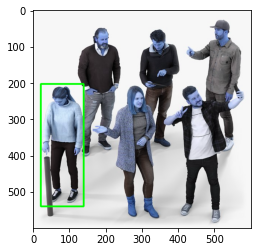

In [10]:
plt.imshow(im)